In [1]:
import os
os.chdir("E:\College\Final year project\images")
import pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
l=["15-LK-10898" , "TN 52 M6912" , "MH12DE1433" , "TN-55 AR 2666" , "TN55 AR 2666"]

In [2]:
from pymongo import MongoClient
# pprint library is used to make the output look more pretty
from pprint import pprint
# connect to MongoDB, change the << MONGODB URL >> to reflect your own connection string 
client = MongoClient(<<MONGODB URL>>)

In [3]:
def main():
    import numpy as np
    import cv2
    import imutils
    import sys
    import pytesseract
    import pandas as pd
    import time
    pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
    img = cv2.imread("1.jpg")
    img = imutils.resize(img, width=500)
    cv2.imshow("Original Image", img)  
    cv2.waitKey(0)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Preprocess 1 - Grayscale Conversion", gray_img) 
    cv2.waitKey(0)
    gray_img = cv2.bilateralFilter(gray_img, 11, 17, 17)
    cv2.imshow("Preprocess 2 - Bilateral Filter", gray_img)   
    cv2.waitKey(0)
    c_edge = cv2.Canny(gray_img, 170, 200)
    cv2.imshow("Preprocess 3 - Canny Edges", c_edge)    
    cv2.waitKey(0)
    cnt, new = cv2.findContours(c_edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(cnt, key = cv2.contourArea, reverse = True)[:30]
    NumberPlateCount = None
    im2 = img.copy()
    cv2.drawContours(im2, cnt, -1, (0,255,0), 3)
    cv2.imshow("Top 30 Contours", im2)      
    cv2.waitKey(0)
    count = 0
    for c in cnt:
        perimeter = cv2.arcLength(c, True)    
        approx = cv2.approxPolyDP(c, 0.02 * perimeter, True)
        if len(approx) == 4:         
            NumberPlateCount = approx
            break
    masked = np.zeros(gray_img.shape,np.uint8)
    new_image = cv2.drawContours(masked,[NumberPlateCount],0,255,-1)
    new_image = cv2.bitwise_and(img,img,mask=masked)
    cv2.imshow("4 - Final_Image",new_image)  
    cv2.waitKey(0)
    configr = ('-l eng --oem 1 --psm 3')
    text_no = pytesseract.image_to_string(new_image, config=configr)
    data = {'Date': [time.asctime(time.localtime(time.time()))],
        'Vehicle_number': [text_no]}
    df = pd.DataFrame(data, columns = ['Date', 'Vehicle_number'])
    df.to_csv('Dataset_VehicleNo.csv')
    cv2.waitKey(0)
    flag=0
    import seaborn as sn 
    data=pd.read_csv(r"C:\Users\user\Documents\MATLAB\testdata.csv")
    reg=data['Registration Number']
    abc=text_no
    for idx,i in enumerate(reg):
        if(i==abc):
            #print(data.loc[idx,:])
            flag=1
    if(flag==0):
        print("Not registered")
    print(text_no)    
if __name__ == '__main__':
    main()

TN 52 M6912


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import cv2
cap = cv2.VideoCapture(0)
add="https:192.168.43.15:8080/video"
cap.open(add)
while(True):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame123',gray)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    contours,h = cv2.findContours(thresh,1,2)
    largest_rectangle = [0,0]
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
        if len(approx)==4: 
            area = cv2.contourArea(cnt)
            if area > largest_rectangle[0]:
                largest_rectangle = [cv2.contourArea(cnt), cnt, approx]

    x,y,w,h = cv2.boundingRect(largest_rectangle[1])
    roi=frame[y:y+h,x:x+w]
    cv2.drawContours(frame,[largest_rectangle[1]],0,(0,0,255),-1)
    plt.imshow(roi, cmap = 'gray')
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    text = pytesseract.image_to_string(roi)
    if(text):
        print(text)
    if cv2.waitKey(1) & 0xFF == ord('f'):
        text = pytesseract.image_to_string(roi)
        break
cap.release()
cv2.destroyAllWindows()        



IRIIJAR4SIIO |
Pw VwANaw VY
TRIIARGIJO:
ren
iii...
IROIIJARGIIO
|RODAR4I06
INJJARSIIO|
INJIAAGIIO:
| TNSSAK4556
eS
ee _ fa
ee /
———
ae /
ae _
ee
ee
ee —_ ft
ae /
I


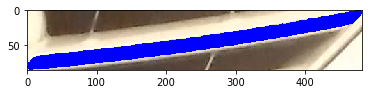

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import cv2
cap = cv2.VideoCapture(0)
add="https:192.168.168.15:8080/video"
cap.open(add)
while(True):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame123',gray)
    c_edge = cv2.Canny(gray, 170, 200)
    contours,h = cv2.findContours(c_edge,1,2)
    largest_rectangle = [0,0]
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
        if len(approx)==4: 
            area = cv2.contourArea(cnt)
            if area > largest_rectangle[0]:
                largest_rectangle = [cv2.contourArea(cnt), cnt, approx]
    
    x,y,w,h = cv2.boundingRect(largest_rectangle[1])
    roi=frame[y:y+h,x:x+w]
    cv2.drawContours(frame,[largest_rectangle[1]],0,(0,0,255),-1)
    plt.imshow(roi, cmap = 'gray')
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    text = pytesseract.image_to_string(roi)
    
    if(text):
        print(text)
    if cv2.waitKey(1) & 0xFF == ord('f'):
        text = pytesseract.image_to_string(roi)
        break
cap.release()
cv2.destroyAllWindows()        

